In [7]:
from create_training_data_lib import random_correlation_matrix, correlation_to_covariance, plot_cov_ellipse
import matplotlib.pyplot as plt
import numpy as np


In [2]:
n_dimensions = 3
max_corr = 0.9
mats = []
for i in range(5000):
    mats.append(random_correlation_matrix(n_dimensions, max_corr))


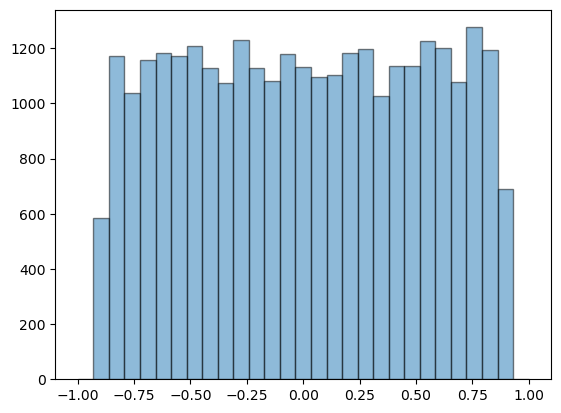

In [3]:
x = np.linspace(-1, 1, 30)
plt.hist(np.hstack([i[~np.eye(i.shape[0], dtype=bool)] for i in mats]), x, edgecolor='k', alpha=0.5);


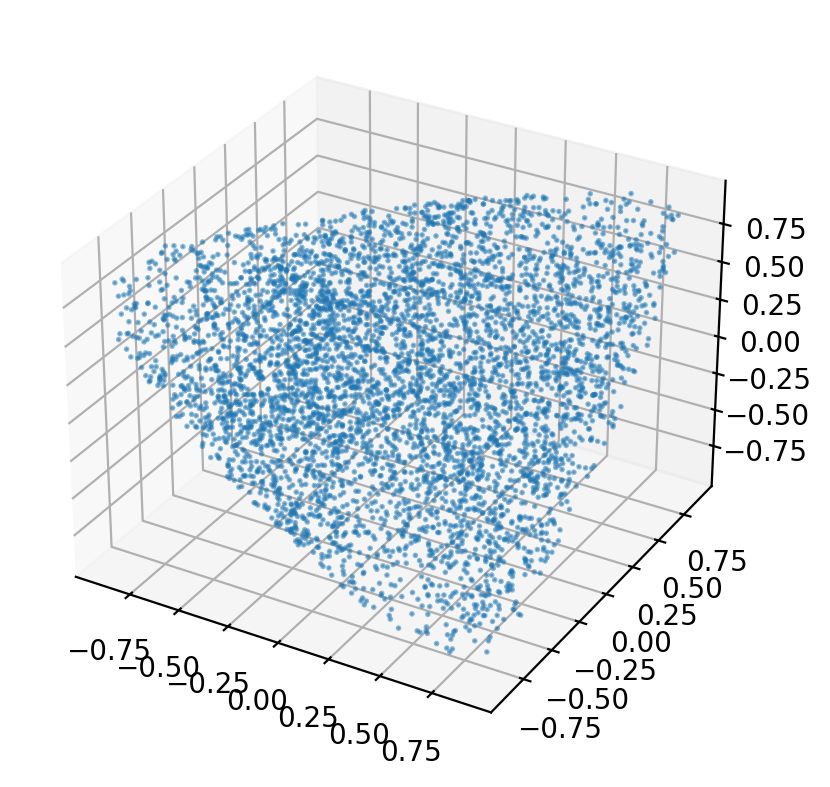

In [4]:
xs = np.array([i[0,1] for i in mats])
ys = np.array([i[0,2] for i in mats])
zs = np.array([i[1,2] for i in mats])

fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, s=1, alpha=0.5);


In [15]:
n_dimensions = 2
n_samples = 500
corr_mats = []
for i in range(n_samples):
    corr_mats.append(random_correlation_matrix(n_dimensions, max_corr))
std_devs = np.random.uniform(1, 1, (n_samples, 2))
cov_mats = [correlation_to_covariance(i,j) for i,j in zip(corr_mats, std_devs)]


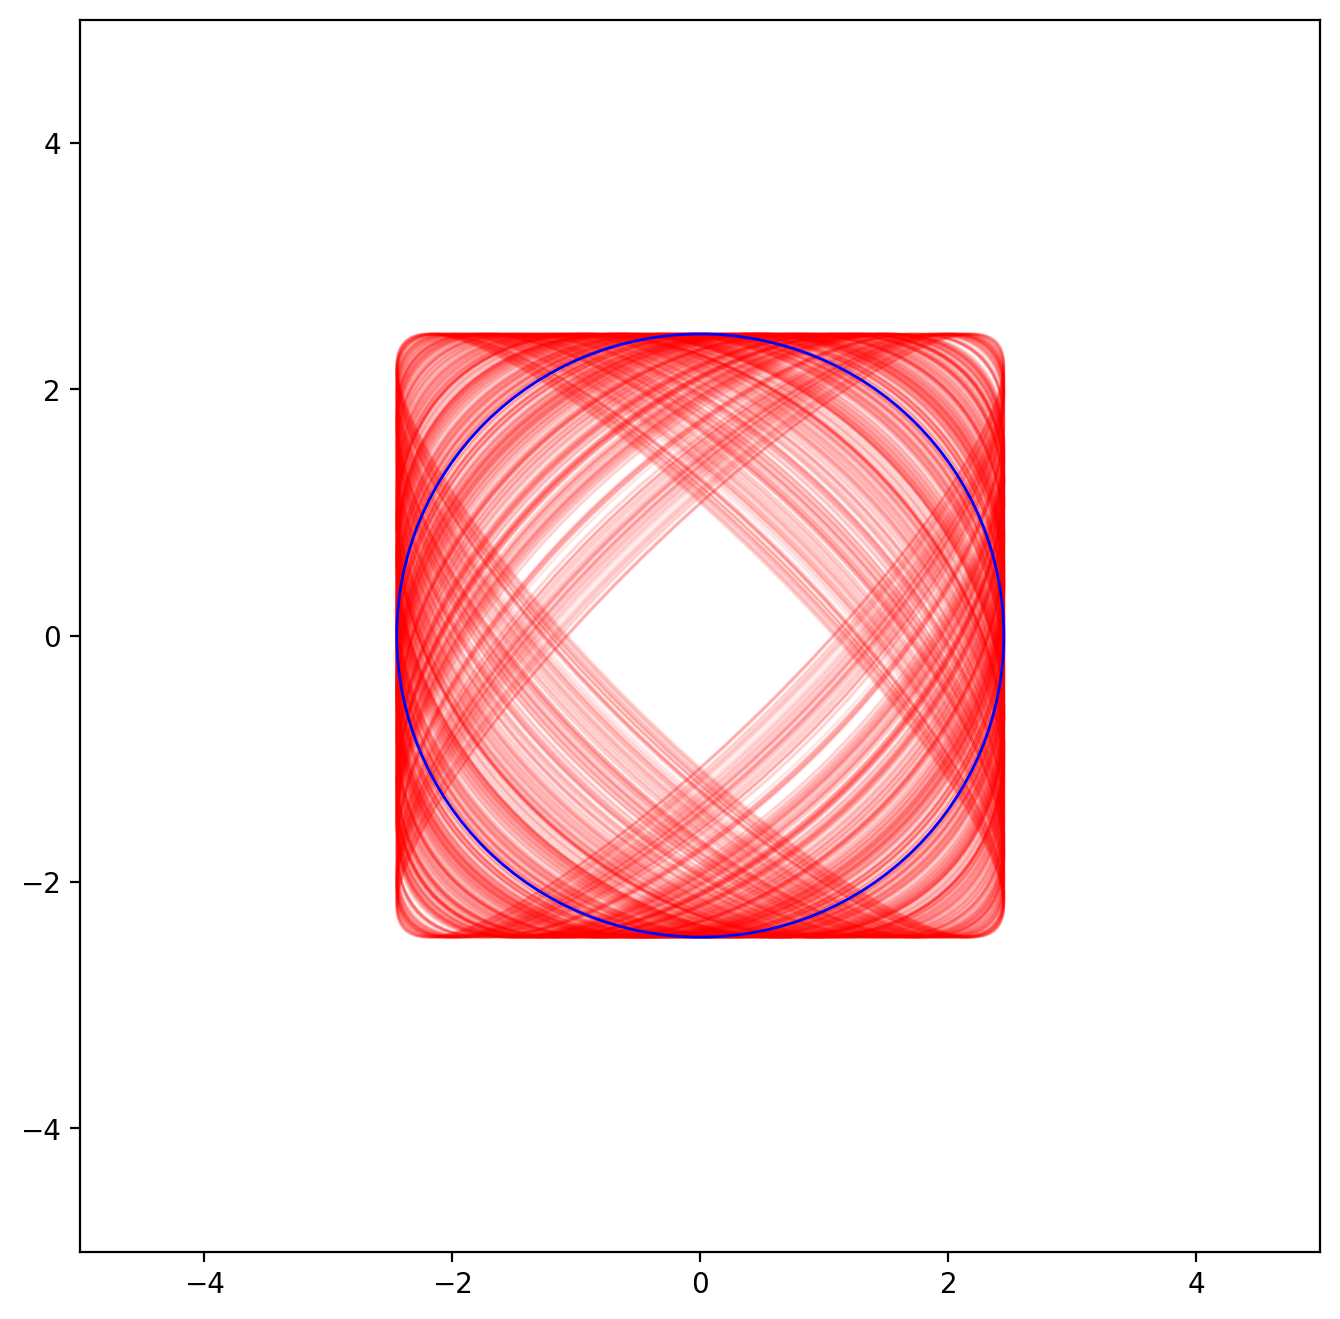

In [24]:
plt.figure(figsize=(8,8), dpi=200)
for i in range(len(cov_mats)):
    ell = plot_cov_ellipse([0, 0], cov_mats[i], alpha=0.1)
    plt.gca().add_patch(ell)
plt.xlim([-5, 5])
plt.ylim([-5, 5]);
ell = plot_cov_ellipse([0, 0], cov_mats[np.argmin([np.abs(i[0,1]) for i in corr_mats])], alpha=1, color='b')
plt.gca().add_patch(ell);
